In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [75]:
Rs = [0, 3, 10, 30, 100, 300, 1_000, 3_000]
R = Rs[-1]
df_classifier = pd.read_csv(f'/home/salesort/Documents/644_CMPUT/res_analysis/df_classifier_R.csv')

In [76]:
#df_classifier.head(200)

In [77]:
kappas = df_classifier["kappa"].unique()

In [78]:
df_classifier["Recall"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FN"]) # TP/(TP+FN)
df_classifier["Precision"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FP"]) # TP/(TP+FP)
df_classifier["TPR"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FN"]) # TP/(TP+FN)
df_classifier["FPR"] = df_classifier["FP"]/(df_classifier["FP"] + df_classifier["TN"]) # FP/(FP+TN)
# Accuracy = (TP+TN)/(TP+TN+FP+FN)
df_classifier["F1"] = 2*df_classifier["TP"]/(2*df_classifier["TP"]+df_classifier["FP"]+df_classifier["FN"])# F1 = 2*TP / (2*TP+FP+FN)

In [79]:
df_classifier.describe()

,R,kappa,accu,TN,FN,TP,FP,Recall,Precision,TPR,FPR,F1
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,184.000000,153.000000,184.000000,207.000000,190.000000
mean,493.777778,13.782609,0.870338,161.014493,4.724638,13.053140,21.207729,0.734239,0.748488,0.734239,0.115990,0.591983
std,939.565113,15.525428,0.245409,50.491226,7.931535,9.028116,50.471566,0.411277,0.354860,0.411277,0.275452,0.412673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.900000,171.000000,0.000000,0.000000,0.000000,0.512500,0.500000,0.512500,0.000000,0.181818
50%,30.000000,7.000000,0.965000,180.000000,0.000000,19.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.769515
75%,300.000000,25.000000,1.000000,180.000000,4.500000,20.000000,9.000000,1.000000,1.000000,1.000000,0.050000,0.975297
max,3000.000000,50.000000,1.000000,200.000000,20.000000,20.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000


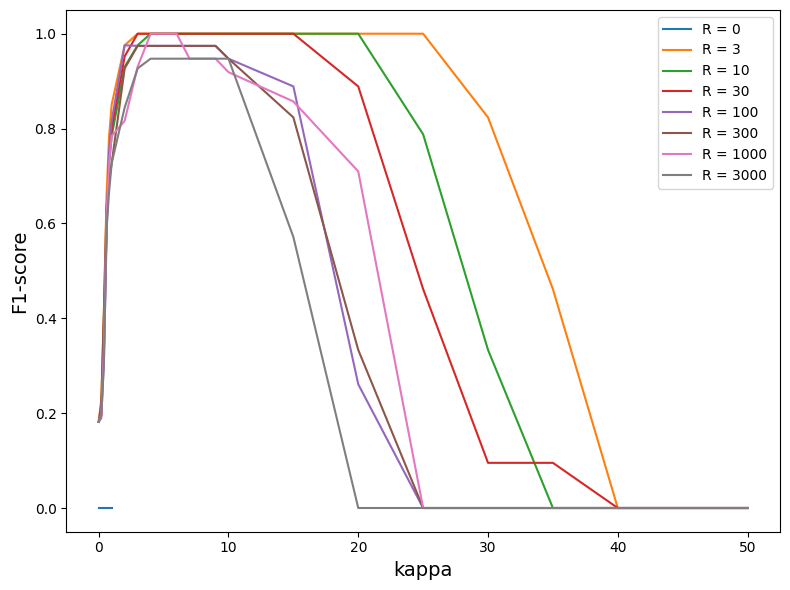

In [80]:
fig1 = plt.figure(figsize=(8,6)) 
ax1 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(2,1,2)
for R in Rs:
    f1_r = df_classifier[df_classifier["R"] == R]["F1"]
    accu = df_classifier[df_classifier["R"] == R]["accu"]
    ax1.plot(kappas, f1_r, label = f"R = {R}")
    #ax2.plot(kappas, accu, label = f"R = {R}")
ax1.set_xlabel("kappa", fontsize=14)
#ax2.set_xlabel("kappa", fontsize=14)
ax1.set_ylabel("F1-score", fontsize=14)
#ax2.set_ylabel("Accuracy", fontsize=14)
ax1.legend(loc="upper right")
#ax2.legend(loc="upper right")
fig1.tight_layout()
    

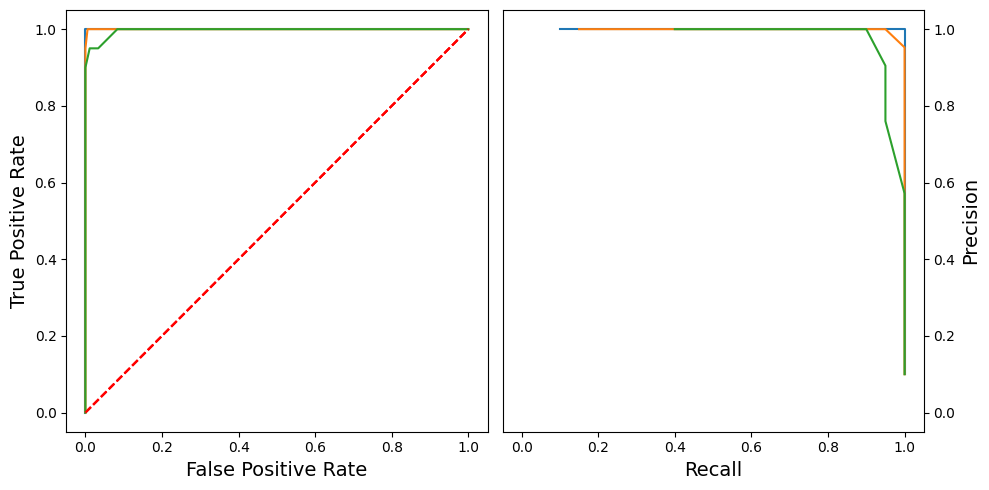

In [81]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

for R in [1, 100, 3000]: #Rs
    Precision = df_classifier[df_classifier["R"] == R]["Precision"]
    Recall = df_classifier[df_classifier["R"] == R]["Recall"]
    TPR = df_classifier[df_classifier["R"] == R]["TPR"]
    FPR = df_classifier[df_classifier["R"] == R]["FPR"]
    ax1.plot(FPR, TPR)
    ax1.plot([0,1],[0,1], color = 'r', ls= '--')
    ax2.plot(Recall, Precision)
    ax1.set_xlim([-0.05, 1.05])
    ax1.set_ylim([-0.05, 1.05])
    ax2.set_xlim([-0.05, 1.05])
    ax2.set_ylim([-0.05, 1.05])
    ax1.set_xlabel("False Positive Rate", fontsize=14)
    ax1.set_ylabel("True Positive Rate", fontsize=14)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_xlabel("Recall", fontsize=14)
    ax2.set_ylabel("Precision", fontsize=14)

#fig1.suptitle(f"ROC and PR for R = {R}")
fig1.tight_layout()

In [82]:
df_classifier[df_classifier["R"] == 100].head(200)

,R,kappa,accu,TN,FN,TP,FP,Recall,Precision,TPR,FPR,F1
115,100,0.0,0.100,0,0,20,180,1.00,0.100000,1.00,1.000000,0.181818
116,100,0.2,0.145,9,0,20,171,1.00,0.104712,1.00,0.950000,0.189573
117,100,0.4,0.560,92,0,20,88,1.00,0.185185,1.00,0.488889,0.312500
118,100,0.6,0.845,149,0,20,31,1.00,0.392157,1.00,0.172222,0.563380
119,100,0.8,0.935,167,0,20,13,1.00,0.606061,1.00,0.072222,0.754717
120,100,1.0,0.955,171,0,20,9,1.00,0.689655,1.00,0.050000,0.816327
121,100,2.0,0.995,179,0,20,1,1.00,0.952381,1.00,0.005556,0.975610
122,100,3.0,0.995,180,1,19,0,0.95,1.000000,0.95,0.000000,0.974359
123,100,4.0,0.995,180,1,19,0,0.95,1.000000,0.95,0.000000,0.974359
124,100,5.0,0.995,180,1,19,0,0.95,1.000000,0.95,0.000000,0.974359
